In [24]:
# Regressione logistica (Logit)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sklearn.linear_model as lm

# E' uno strumento di classificazione binaria
# Parametro c è la regolarizzazione inversa, di solito ha valore pari ad almeno 20. Il valore predefinito 1.0

In [25]:
#grades = pd.read_csv("./code/grades.csv", sep="\t")
grades = pd.read_table("./code/grades.csv")
grades.head()

,Final score,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Quiz 6,Quiz 8.1,Quiz 8.2,Quiz 9.1,Quiz 9.2,Quiz 10.1,Quiz 10.2,Final exam
0,88.85,34.5,45.0,46.2,37.0,37.25,36.25,9.5,26.0,11.00000,26.50,11.0,16.02,266.66666
1,74.05,29.5,12.0,21.0,11.0,7.50,32.00,11.0,28.5,10.33333,21.50,10.0,15.48,212.66667
2,63.05,28.3,23.0,3.0,10.0,24.00,30.00,8.5,30.0,6.33333,0.00,12.0,12.96,187.50000
3,96.49,40.0,49.0,45.9,40.0,39.95,39.00,9.5,31.0,11.00000,26.50,10.0,13.37,277.50000
4,81.72,40.0,48.5,45.0,35.0,34.50,34.80,10.5,32.0,11.00000,20.15,11.0,12.42,154.33333


In [26]:
# Discretizzazione dai voti numerici alle lettere
labels = ("F","D","C","B","A")
grades["Letter"] = pd.cut(grades["Final score"], [0,60,70,80,90,100], labels=labels)
grades.head()

,Final score,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Quiz 6,Quiz 8.1,Quiz 8.2,Quiz 9.1,Quiz 9.2,Quiz 10.1,Quiz 10.2,Final exam,Letter
0,88.85,34.5,45.0,46.2,37.0,37.25,36.25,9.5,26.0,11.00000,26.50,11.0,16.02,266.66666,B
1,74.05,29.5,12.0,21.0,11.0,7.50,32.00,11.0,28.5,10.33333,21.50,10.0,15.48,212.66667,C
2,63.05,28.3,23.0,3.0,10.0,24.00,30.00,8.5,30.0,6.33333,0.00,12.0,12.96,187.50000,D
3,96.49,40.0,49.0,45.9,40.0,39.95,39.00,9.5,31.0,11.00000,26.50,10.0,13.37,277.50000,A
4,81.72,40.0,48.5,45.0,35.0,34.50,34.80,10.5,32.0,11.00000,20.15,11.0,12.42,154.33333,B


In [27]:
# Preparazione modello
# Vogliamo vedere se i voti dei primi due quiz permettono di prevedere il voto finale dello studente o se sarà sufficiente (almeno C) o insufficiente

# Matrice in ingresso
X = grades[["Quiz 1", "Quiz 2"]]
# Vofi finali
y = grades["Letter"]
# Effettuo il training
model = lm.LogisticRegression(C=20.0).fit(X,y)

In [28]:
# Predizione valori
yp = model.predict(X)

In [29]:
# Valutazione modello, visualizza lo score e la matrice di confusione
model_score = model.score(X, y)
cm = confusion_matrix(model.predict(X), grades["Letter"])
print("Score={0:.3f}".format(model_score))
print("Confusion Matrix:")
print(pd.DataFrame(cm, columns=labels, index=labels))

Score=0.535
Confusion Matrix:
   F   D  C  B  A
F  0   0  0  0  0
D  2  15  4  3  1
C  0   2  6  2  1
B  0   0  1  0  1
A  0   0  1  2  2


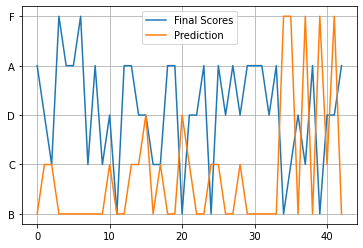

In [30]:
# Tracciamento grafico
plt.plot(grades.index, y, label="Final Scores")
plt.plot(grades.index, yp, label="Prediction")
plt.legend()
plt.grid(True)